For the null hypothesis that the mean change in beta carotene is 0 mcg/dL and the alternative hypothesis
that the mean change in beta carotene is 100 mcg/dL, with change = 75 mcg/dL and n = 5, what is the
power to detect that difference, using  = 0.05 (two-sided)? Assume two cases: known s.d. and unknown s.d

# 1 - Known σ

In [25]:
#The change is actually 100. 75 is the standard deviation. So it will be
PowerZ <- function(diff = 100, sd = 75, n = 5, alpha = 0.05) { 
    z.alpha <- qnorm(1 - (alpha/2))
    power <- pnorm( abs(diff) / (sd/sqrt(n) ) - z.alpha)
    return(power)
}
PowerZ( diff=100, sd=75, n=5, alpha=0.05)

[1] 0.8464817

# Unknown  sd

In [31]:
pwrt_unknownsd <- power.t.test(n = 5, sd = 75, sig.level = 0.05, delta = 100, type = "one.sample", alternative = "two.sided")
pwrt_unknownsd 


     One-sample t test power calculation 

              n = 5
          delta = 100
             sd = 75
      sig.level = 0.05
          power = 0.6141832
    alternative = two.sided


In [32]:
pwrt_unknownsd$power

[1] 0.6141832

In [ ]:
So the change is actually 100. 75 is the standard deviation. So it will be

diff = 100, sd = 75, n = 5, alpha = 0.05
n = 5, sd = 75, sig.level = 0.05, delta = 100, type = "one.sample", alternative = "two.sided"

In [46]:
PowerZ( diff=94.16, sd=75, n=5, alpha=0.05)

[1] 0.8015985

In [57]:
power.t.test(n=5, sd=75, power=0.8, sig.level=0.05, delta=NULL, type="one.sample", alternative="two.sided")# view all output


     One-sample t test power calculation 

              n = 5
          delta = 126.1498
             sd = 75
      sig.level = 0.05
          power = 0.8
    alternative = two.sided


# 3a

In [33]:
set.seed(2345)
n <- 5
mean <- 0
sd <- 75
numTrials <- 10000
alpha <- .05
count<- 0 # Set a counter to determine the number of rejected hypothesis tests
for( i in 1:numTrials){
  y <- rnorm(n=n, mean=0, sd=sd) # generate sample from desired distribution
  # Perform test
  t <- t.test(y, alternative = "two.sided")
  count <- count + (t$p.value < alpha)
}
# Power = proportion of rejections
power <- count/numTrials
power

[1] 0.0498

In [47]:
set.seed(2345)

y <- rnorm(n=5, mean=0, sd=75)
tstat <- -1 * abs( (mean(y)-0) / (sd(y)/sqrt(n)) )
pt( tstat, df=n-1) * 2 # our p-value

[1] 0.673227

In [48]:
# Compare to the t-test
t.test(y, mu = 0, alternative = "two.sided")$p.value

[1] 0.673227

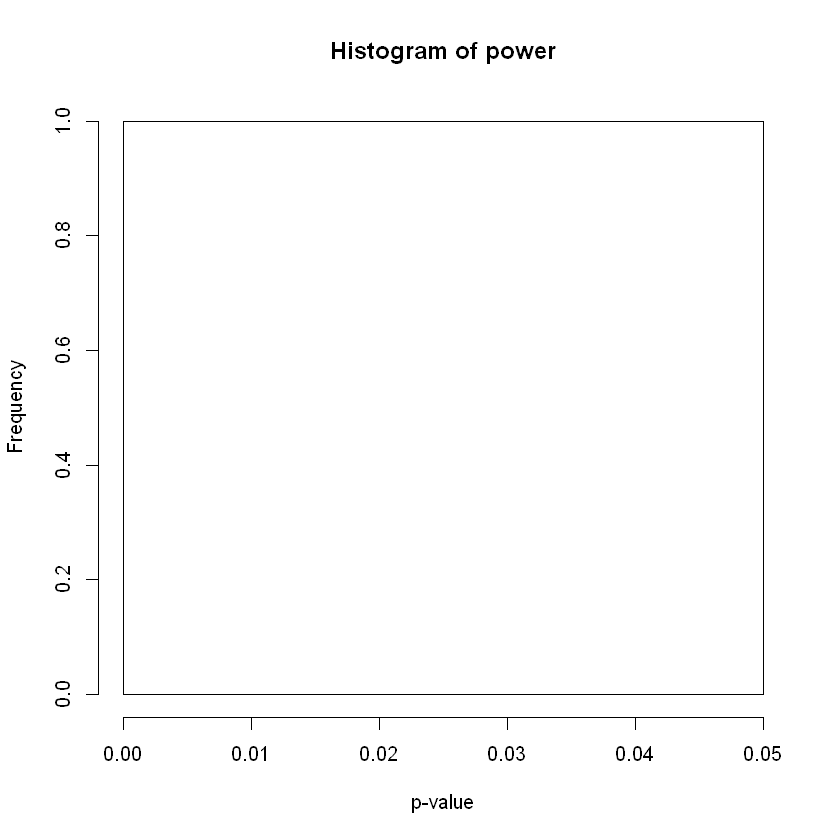

In [36]:
hist( power, xlab='p-value' )

# Scenario 2:
Use simulation to obtain a power estimate when the alternative hypothesis assumes the mean
change is 100 mcg/dL. Use 10,000 iterations and the seed value 1796.

# Alternative Hypotheses

In [43]:
set.seed(1796)
n <- 5
mean <- 100
sd <- 75
numTrials <- 10000
alpha <- .05
count<- 0 # Set a counter to determine the number of rejected hypothesis tests
for( i in 1:numTrials){
  y <- rnorm(n=n, mean=100, sd=sd) # generate sample from desired distribution
  # Perform test
  t <- t.test(y, alternative = "two.sided")
 
  count <- count + (t$p.value < alpha)
  
}
# Power = proportion of rejections
power <- count/numTrials
power

[1] 0.613

In [38]:
mean <- c(0,100) 
mean

[1]   0 100

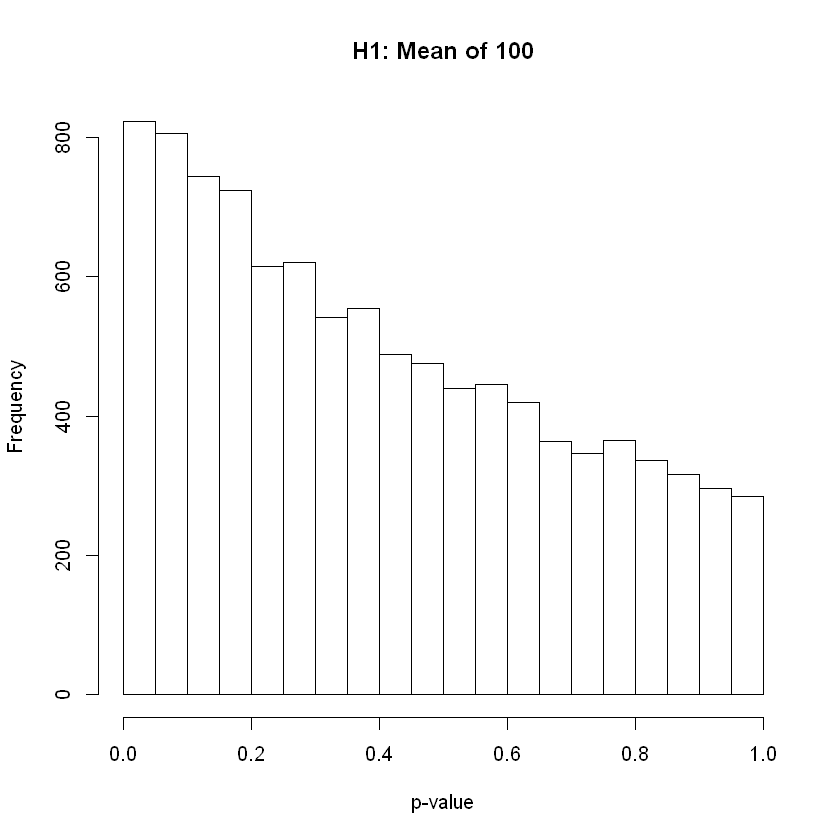

In [37]:
set.seed(1796)
n <- 5
mean <- c(0,100) 
sd <- 75
numTrials <-10000
alpha <- 0.05 
  
# For this for loop, we will save the p-value from each t.test result 
pvec <- rep(NA, numTrials)
for(i in 1:numTrials){
  y <- rnorm(n,mean,sd) # simulate the data for the i-th simulation
  t <- t.test(y, mu = 0, alternative = "two.sided") # conduct a one-sample, two-sided t-test
  pvec[i] <- t$p.value
}

hist( pvec, xlab='p-value', main='H1: Mean of 100' )

In [5]:
install.packages("epiR")

also installing the dependency 'BiasedUrn'



package 'BiasedUrn' successfully unpacked and MD5 sums checked
package 'epiR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpyY7H7f\downloaded_packages


In [4]:
library(epiR)

Warning message:
"package 'epiR' was built under R version 3.6.3"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Package epiR 1.0-15 is loaded
Type help(epi.about) for summary information
Type browseVignettes(package = 'epiR') to learn how to use epiR for applied epidemiological analyses




In [ ]:
matrix( c(65,15,72,48), nrow=2, byrow=T)

In [1]:
lc <-as.table(matrix(c(681,784,3299,2327) ,nrow=2,byrow=T))
dimnames(lc)<-list(groups=c("A","B"), x=c("Yes","No"))

In [2]:
lc

      x
groups  Yes   No
     A  681  784
     B 3299 2327

In [51]:
!install package("Publish")

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected symbol
1: !install package
             ^


In [5]:
epi.2by2(lc)

             Outcome +    Outcome -      Total        Inc risk *        Odds
Exposed +          681          784       1465              46.5       0.869
Exposed -         3299         2327       5626              58.6       1.418
Total             3980         3111       7091              56.1       1.279

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                               0.79 (0.75, 0.84)
Odds ratio                                   0.61 (0.55, 0.69)
Attrib risk *                                -12.15 (-15.01, -9.29)
Attrib risk in population *                  -2.51 (-4.24, -0.78)
Attrib fraction in exposed (%)               -26.15 (-33.83, -18.90)
Attrib fraction in population (%)            -4.47 (-5.56, -3.40)
-------------------------------------------------------------------
 Test that OR = 1: chi2(1) = 69.725 Pr>chi2 = <0.001
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 populatio

In [6]:
epi.tests(lc)

          Outcome +    Outcome -      Total
Test +          681          784       1465
Test -         3299         2327       5626
Total          3980         3111       7091

Point estimates and 95 % CIs:
---------------------------------------------------------
Apparent prevalence                    0.21 (0.20, 0.22)
True prevalence                        0.56 (0.55, 0.57)
Sensitivity                            0.17 (0.16, 0.18)
Specificity                            0.75 (0.73, 0.76)
Positive predictive value              0.46 (0.44, 0.49)
Negative predictive value              0.41 (0.40, 0.43)
Positive likelihood ratio              0.68 (0.62, 0.74)
Negative likelihood ratio              1.11 (1.08, 1.14)
---------------------------------------------------------

# X^2 Test of Independence

In [20]:
chisq.test(lc, correct=F)


	Pearson's Chi-squared test

data:  lc
X-squared = 10.045, df = 1, p-value = 0.001527


In [21]:
chisq.test(lc, correct=T)


	Pearson's Chi-squared test with Yates' continuity correction

data:  lc
X-squared = 9.0845, df = 1, p-value = 0.002578


In [22]:
fisher.test(lc)


	Fisher's Exact Test for Count Data

data:  lc
p-value = 0.001799
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.420827 6.074658
sample estimates:
odds ratio 
   2.87396 


# McNemar's Chi-squared test with no correction

In [23]:
lc <-as.table(matrix(c(65,15,72,48) ,ncol=2,byrow=T))
dimnames(lc)<-list(groups=c("A","B"), x=c("Yes","No"))

mcnemar.test(lc, correct=F) # no correction


	McNemar's Chi-squared test

data:  lc
McNemar's chi-squared = 37.345, df = 1, p-value = 9.898e-10


# McNemar's Chi-squared test with w/continuity correction

In [25]:
lc <-as.table(matrix(c(65,15,72,48) ,ncol=2,byrow=T))
dimnames(lc)<-list(groups=c("A","B"), x=c("Yes","No"))

mcnemar.test(lc, correct=T) # w/continuity correction


	McNemar's Chi-squared test with continuity correction

data:  lc
McNemar's chi-squared = 36.046, df = 1, p-value = 1.927e-09


In [3]:
score20 <- t1[which(t1$cmms_sc<=20), c("nondemented","demented")]

ERROR: Error in t1$cmms_sc: $ operator is invalid for atomic vectors


  cmms_sc nondemented demented
A       5           0        2
B      10           0        1
C      15           3        4
D      20           9        5

In [34]:
dat1 <- read.csv('D:/3rd_Semester/6611_biostatisticalmethod/hw5/d.csv')

In [36]:
head(dat1)

cmms_score,dementia
5,1
5,1
10,1
15,0
15,0
15,0


Warning message in roc.default(response, predictors[, 1], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"Setting levels: control = 5, case = 10
Setting direction: controls < cases


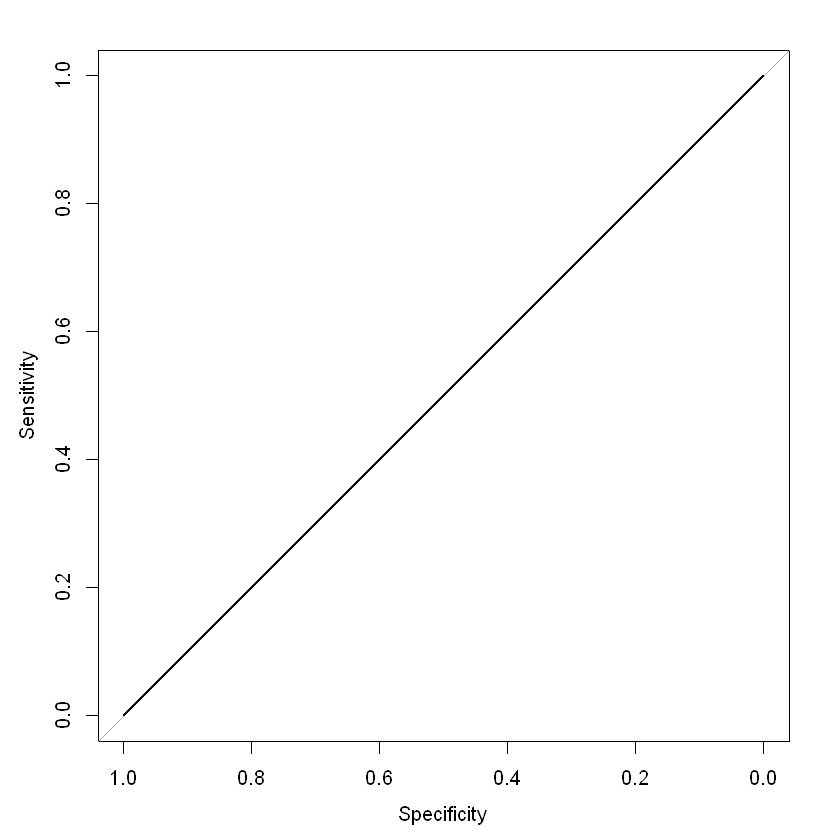

In [37]:
library(pROC)
roc3 <- roc(cmms_score ~ dementia, data=dat1)
plot(roc3)

In [39]:
roc_binormal <- rocit(score = dat1$cmms_score, 
                      class = dat1$dementia,
                      method = "bin") 

In [40]:
summary(roc_binormal)

                          
 Method used: binormal    
 Number of positive(s): 16
 Number of negative(s): 46
 Area under curve: 0.8191 


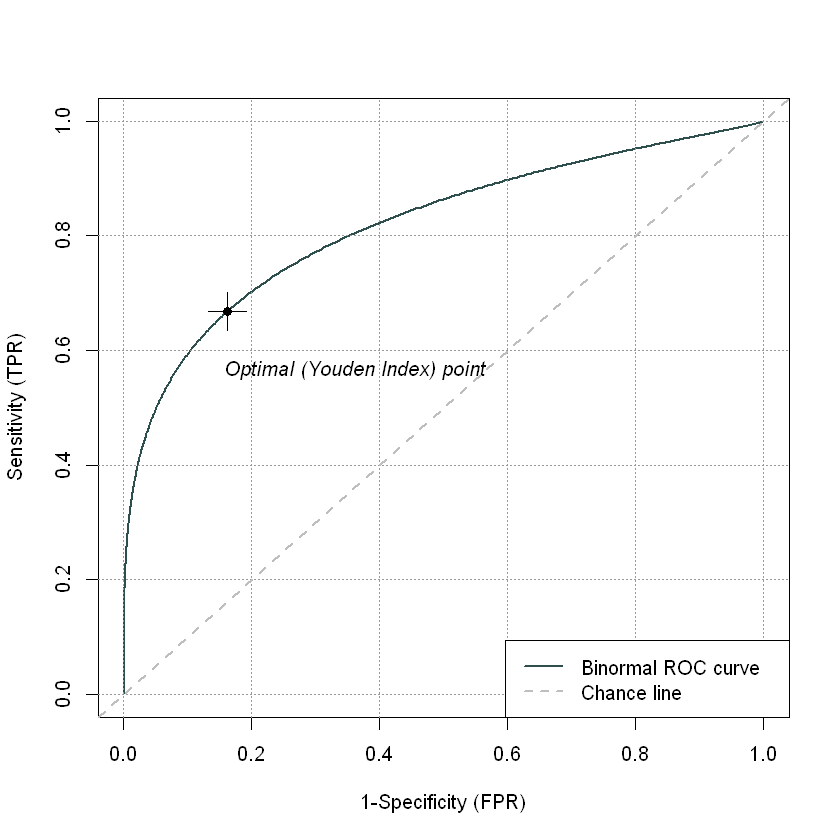

In [42]:
plot(roc_binormal, values = T)

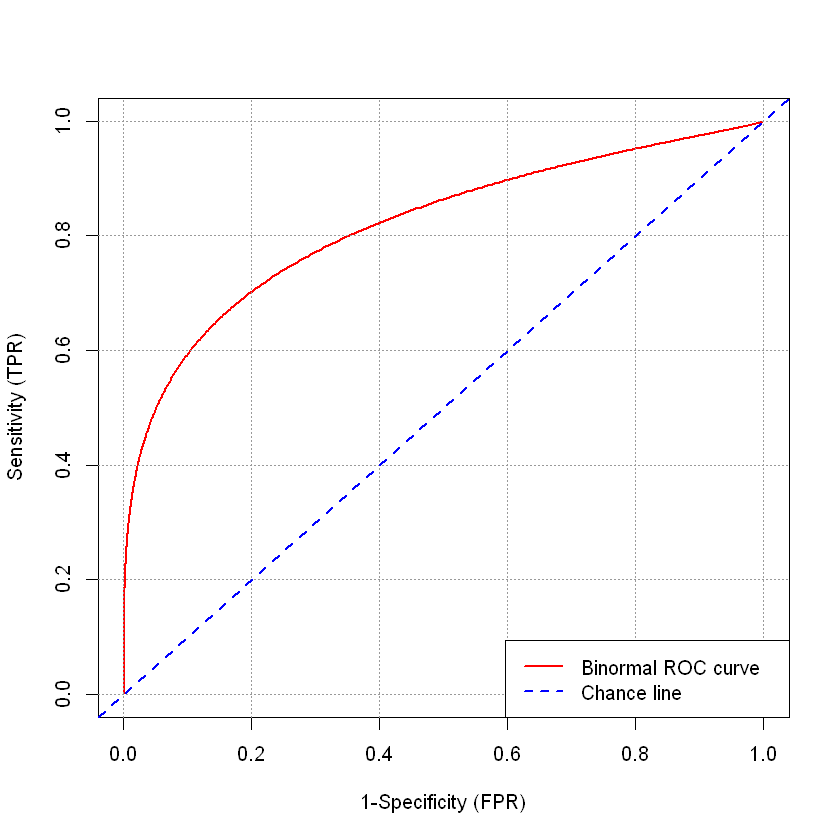

In [43]:
plot(roc_binormal, YIndex = F, 
     values = F, col = c(2,4))

In [31]:
t2 <- matrix(c(5,0,2,10,0,1,15,3,4,20,9,5),ncol=3,byrow=TRUE)
colnames(t2) <- c("cmms_sc","nondemented","demented")
#rownames(smoke) <- c("current","former","never")
t2 <- as.table(t2)
t2 <- as.data.frame.matrix(t2) 
t2

,cmms_sc,nondemented,demented
A,5,0,2
B,10,0,1
C,15,3,4
D,20,9,5


In [8]:
cmms_t1 <- as.table(matrix (c(12,12,4,34), ncol=2, byrow=T))
cmms_t1

   A  B
A 12 12
B  4 34

In [11]:
epi.2by2(cmms_t1)

             Outcome +    Outcome -      Total        Inc risk *        Odds
Exposed +           12           12         24              50.0       1.000
Exposed -            4           34         38              10.5       0.118
Total               16           46         62              25.8       0.348

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                               4.75 (1.73, 13.04)
Odds ratio                                   8.50 (2.30, 31.47)
Attrib risk *                                39.47 (17.22, 61.73)
Attrib risk in population *                  15.28 (0.66, 29.90)
Attrib fraction in exposed (%)               78.95 (42.22, 92.33)
Attrib fraction in population (%)            59.21 (11.05, 81.29)
-------------------------------------------------------------------
 Test that OR = 1: chi2(1) = 11.971 Pr>chi2 = <0.001
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 population un

In [12]:
epi.tests(cmms_t1)

          Outcome +    Outcome -      Total
Test +           12           12         24
Test -            4           34         38
Total            16           46         62

Point estimates and 95 % CIs:
---------------------------------------------------------
Apparent prevalence                    0.39 (0.27, 0.52)
True prevalence                        0.26 (0.16, 0.38)
Sensitivity                            0.75 (0.48, 0.93)
Specificity                            0.74 (0.59, 0.86)
Positive predictive value              0.50 (0.29, 0.71)
Negative predictive value              0.89 (0.75, 0.97)
Positive likelihood ratio              2.87 (1.64, 5.05)
Negative likelihood ratio              0.34 (0.14, 0.80)
---------------------------------------------------------

In [15]:
t2 <- as.data.frame.matrix(cmms_t1)
t2

,A,B
A,12,12
B,4,34


In [41]:
install.packages("pROC")

package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\Rtmp0MkSJB\downloaded_packages


In [13]:
library(pROC)

Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



Setting levels: control = 4, case = 12
Setting direction: controls > cases


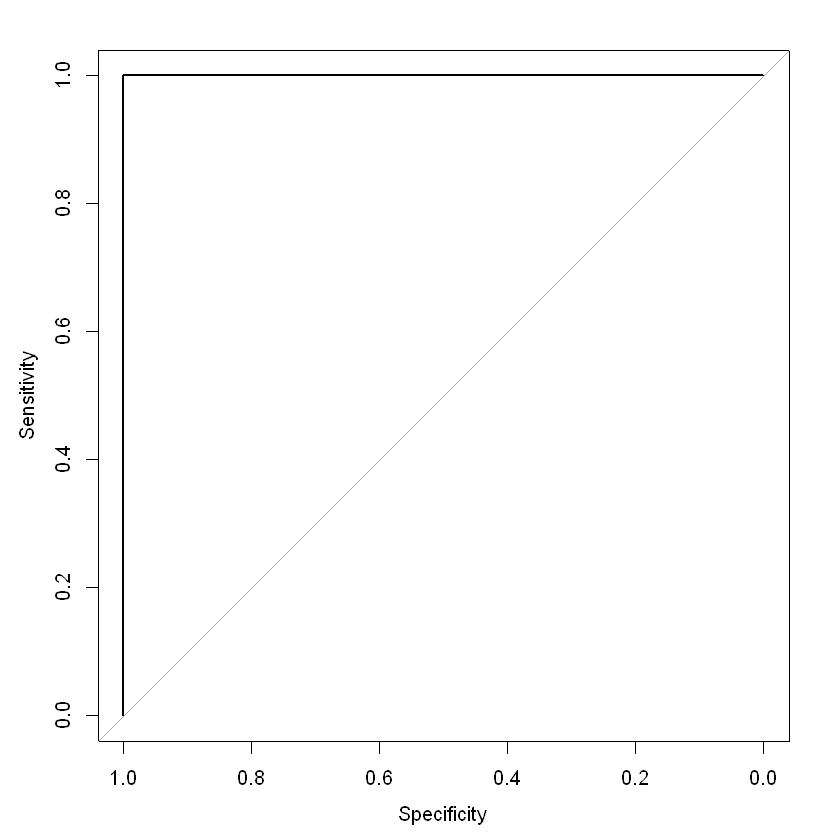

In [18]:
roc3 <- roc(A ~ B, data=t2)
plot(roc3)

Warning message in roc.default(response, predictors[, 1], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"Setting levels: control = 0, case = 3
Setting direction: controls < cases


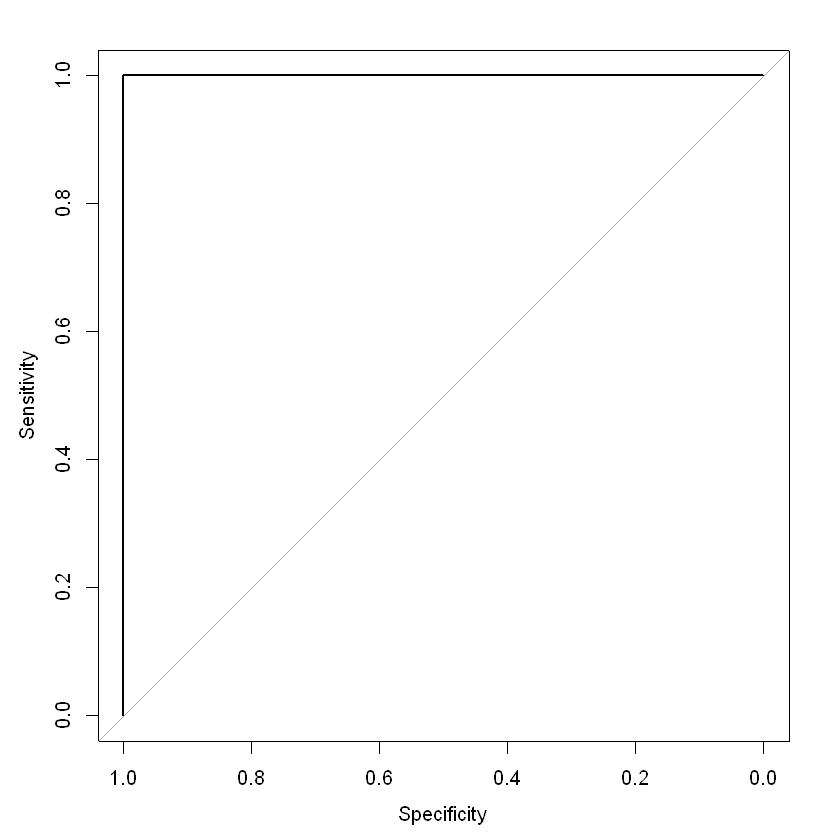

In [33]:
roc3 <- roc(nondemented ~ demented, data=t2)
plot(roc3)

In [25]:
install.packages("ROCit")

package 'ROCit' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpIVQPpD\downloaded_packages


In [26]:
library("ROCit")

Warning message:
"package 'ROCit' was built under R version 3.6.3"

In [32]:
roc_binormal <- rocit(score = t2$nondemented, 
                      class = t2$demented, 
                      method = "bin") 

ERROR: Error in convertclass(class, reference = negref): class must have exactly two unique values


In [28]:
summary(roc_binormal)

                         
 Method used: binormal   
 Number of positive(s): 1
 Number of negative(s): 1
 Area under curve: NaN   


In [19]:
auc(roc3)

Area under the curve: 1

In [39]:
fisher.test(t2$nondemented, t2$demented)


	Fisher's Exact Test for Count Data

data:  t2$nondemented and t2$demented
p-value = 1
alternative hypothesis: two.sided
